<a href="https://colab.research.google.com/github/BenjaminUy/Predicting-Loan-User-Default-Risk/blob/main/notebooks/Model_Development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **India Loan Users - Model Development**
Notebook creator: Benjamin Uy

Date created: 6/30/2025

---
Introduction: This is my Jupyter notebook for model development on a dataset of loan customers from India.

The dataset I will use is a modifed and cleaned version of Kaggle user Subham Surana's "Loan Prediction Based on Customer Behavior" (link below). The purpose of creating a model is to accurately predict, given the details of the customer, whether they will default on their loan -- indicated by the 'Risk_Flag' variable.

Link to original dataset: https://www.kaggle.com/datasets/subhamjain/loan-prediction-based-on-customer-behavior?select=Training+Data.csv

Link to modified datasets: https://github.com/BenjaminUy/Predicting-Loan-User-Default-Risk/blob/main/datasets/loan_users_cleaned_1.csv

https://github.com/BenjaminUy/Predicting-Loan-User-Default-Risk/blob/main/datasets/loan_users_cleaned_2.csv

(Note, these need to be concatenated horizontally to create the full modified dataframe)

In [1]:
import pandas as pd

# Read in the cleaned datasets
url1 = 'https://raw.githubusercontent.com/BenjaminUy/Predicting-Loan-User-Default-Risk/refs/heads/main/datasets/loan_users_cleaned_1.csv'
url2 = 'https://raw.githubusercontent.com/BenjaminUy/Predicting-Loan-User-Default-Risk/refs/heads/main/datasets/loan_users_cleaned_2.csv'

df1 = pd.read_csv(url1)
df2 = pd.read_csv(url2)

# Concatenate the two dataframes horizontally
df = pd.concat([df1, df2], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 34 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Income                              252000 non-null  int64  
 1   Age                                 252000 non-null  int64  
 2   Experience                          252000 non-null  int64  
 3   Is_Married                          252000 non-null  int64  
 4   House_Ownership_Ordinal             252000 non-null  int64  
 5   Owns_Car                            252000 non-null  int64  
 6   CURRENT_JOB_YRS                     252000 non-null  int64  
 7   CURRENT_HOUSE_YRS                   252000 non-null  int64  
 8   Risk_Flag                           252000 non-null  int64  
 9   Above_Income_Threshold              252000 non-null  int64  
 10  Sector_Architecture & Construction  252000 non-null  int64  
 11  Sector_Aviation & Transpor

In [2]:
df.head()

,Income,Age,Experience,Is_Married,House_Ownership_Ordinal,Owns_Car,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Above_Income_Threshold,...,STATE_Madhya_Pradesh,STATE_Maharashtra,STATE_Other,STATE_Rajasthan,STATE_Tamil_Nadu,STATE_Uttar_Pradesh,STATE_West_Bengal,Career_Maturity,Housing_Stability,Stability_Score
0,1303834,23,3,0,1,0,3,13,0,0,...,1,0,0,0,0,0,0,0.130435,0.565217,1
1,7574516,40,10,0,1,0,9,13,0,1,...,0,1,0,0,0,0,0,0.225000,0.325000,3
2,3991815,66,4,1,1,0,4,10,0,1,...,0,0,1,0,0,0,0,0.060606,0.151515,3
3,6256451,41,2,0,1,1,2,12,1,1,...,0,0,1,0,0,0,0,0.048780,0.292683,3
4,5768871,47,11,0,1,0,3,14,1,1,...,0,0,0,0,1,0,0,0.063830,0.297872,2


In [3]:
from sklearn.model_selection import train_test_split

import numpy as np

X = df.drop('Risk_Flag', axis=1)
y = df['Risk_Flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=123, stratify=y)

print("X_train size: ", X_train.shape)
print("X_test size: ", X_test.shape)
print("y_train size: ", y_train.shape)
print("y_test size: ", y_test .shape)

X_train size:  (201600, 33)
X_test size:  (50400, 33)
y_train size:  (201600,)
y_test size:  (50400,)


In [4]:
# Check proportion of Risk_Flag in both datasets
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

Risk_Flag
0    0.876999
1    0.123001
Name: proportion, dtype: float64
Risk_Flag
0    0.877004
1    0.122996
Name: proportion, dtype: float64


Given the imbalance of class proportions in Risk_Flag, I will be focusing less on Accuracy and more on Precision and Recall.

Just for reference:
- Precision - number of predicted positives that are positive
- Recall - number of actual positives that are positive

### Random Forest Approach

In [5]:
'''
Given the large amount of data I am working with, along with the
model's ability to better generalize, I try a random forest classifier.
Let's see how the base model performs.
'''

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=123)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Accuracy of base model: 0.900
Precision of base model: 0.608
Recall of base model: 0.526
F1 Score of base model: 0.564


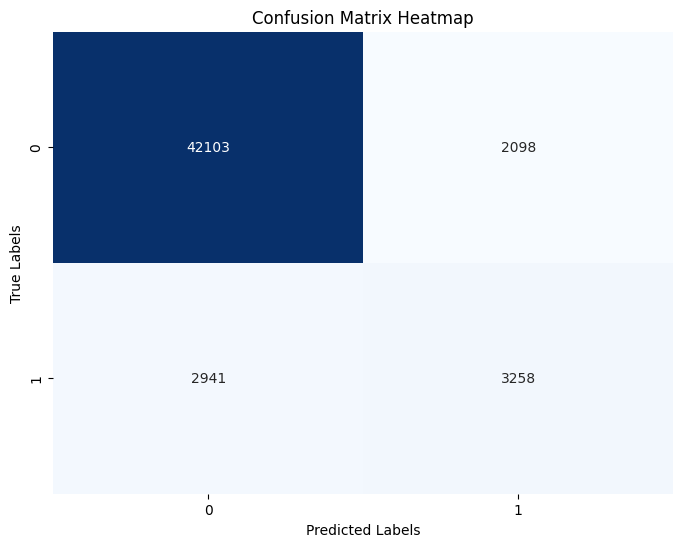

In [19]:
# Checking various score metrics and outputting confusion matrix

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print(f"Accuracy of base model: {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision of base model: {precision_score(y_test, y_pred):.3f}")
print(f"Recall of base model: {recall_score(y_test, y_pred):.3f}")
print(f"F1 Score of base model: {f1_score(y_test, y_pred):.3f}")

conf_matrix_before = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_before, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=y.unique(), yticklabels=y.unique())

plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

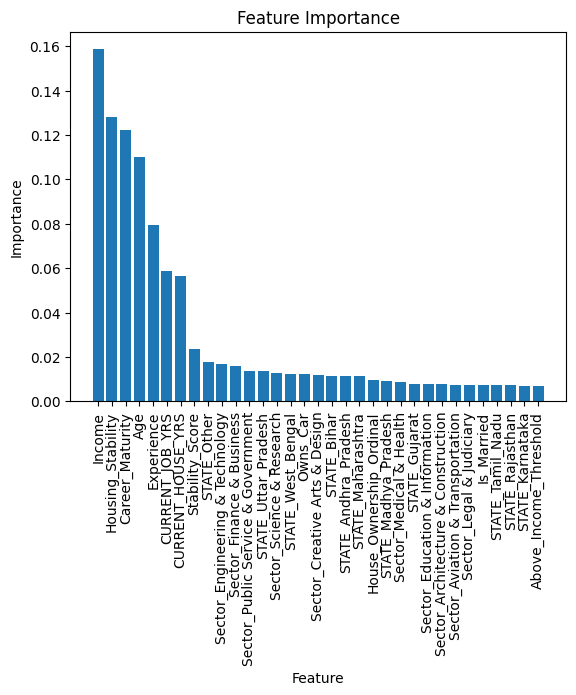

In [10]:
# Checking what are the most important features in the model
feature_importances = clf.feature_importances_

importances_df = pd.DataFrame({'Feature' : X.columns, 'Importance' : feature_importances})
importances_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.bar(importances_df['Feature'], importances_df['Importance'])

plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

From the feature importances graph, it appears the Sector_*, STATE_*, Owns_Car, and Above_Income_Threshold are not as important compared to Income and Age.

In [13]:
# Let's select the top 10 features in importance
N = 10
top_n_features = importances_df[:N]['Feature']
X_train_selected = X_train[top_n_features]
X_test_selected = X_test[top_n_features]

top_n_features

,Feature
0,Income
31,Housing_Stability
30,Career_Maturity
1,Age
2,Experience
6,CURRENT_JOB_YRS
7,CURRENT_HOUSE_YRS
32,Stability_Score
25,STATE_Other
13,Sector_Engineering & Technology


Accuracy after feature selection: 0.899
Precision after feature selection: 0.601
Recall after feature selection: 0.528
F1 Score after feature selection: 0.563


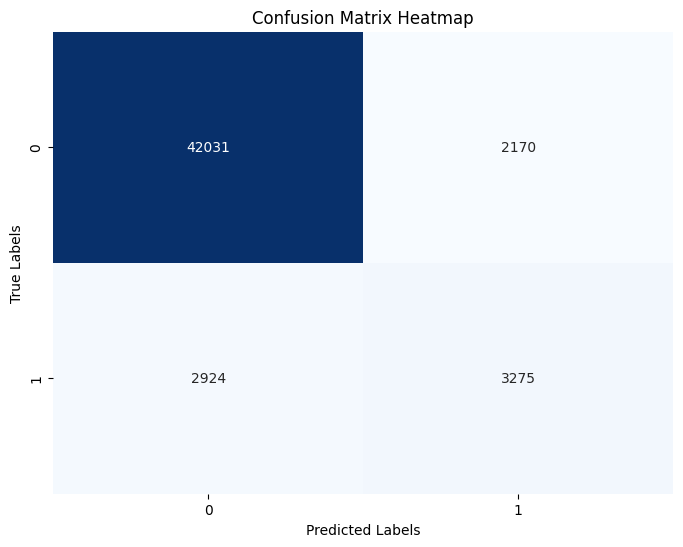

In [20]:
# Train the base random forest model with the top_n_features
clf_selected = RandomForestClassifier(random_state=123)
clf_selected.fit(X_train_selected, y_train)
y_pred_selected = clf_selected.predict(X_test_selected)

# Evaulation of model after feature selection
print(f"Accuracy after feature selection: {accuracy_score(y_test, y_pred_selected):.3f}")
print(f"Precision after feature selection: {precision_score(y_test, y_pred_selected):.3f}")
print(f"Recall after feature selection: {recall_score(y_test, y_pred_selected):.3f}")
print(f"F1 Score after feature selection: {f1_score(y_test, y_pred_selected):.3f}")

conf_matrix_after = confusion_matrix(y_test, y_pred_selected)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_after, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=y.unique(), yticklabels=y.unique())

plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

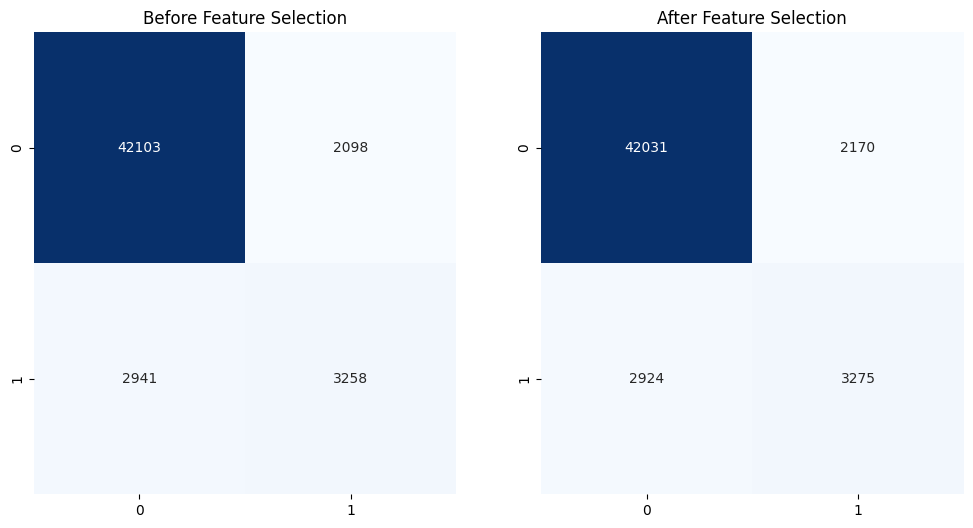

In [21]:
# Plot both confusion matrices side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].set_title('Before Feature Selection')
sns.heatmap(conf_matrix_before, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=y.unique(), yticklabels=y.unique(), ax=axs[0])

axs[1].set_title('After Feature Selection')
sns.heatmap(conf_matrix_after, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=y.unique(), yticklabels=y.unique(), ax=axs[1])

plt.show()

Using feature selection results in a marginal decrease in model accuracy and precision. I'll continue to use the model with feature selection.



In [64]:
# Let's use RandomizedSearchCV to optimize our model parameters
from sklearn.model_selection import RandomizedSearchCV

clf = RandomForestClassifier(random_state=123)

'''
Note, we are using X_train_selected with feature selection, so I probably
don't need a max_features parameter.
Also, I'll limit max_depth to 20 to prevent overfitting
'''
param_dist = {
    'n_estimators': [50, 100],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

search = RandomizedSearchCV(estimator=clf, param_distributions=param_dist,
                                 n_iter=20, scoring='f1', cv=4, verbose=1)
search.fit(X_train_selected, y_train)

print("Best parameters found: ", search.best_params_)
print("Best score found: ", search.best_score_)

best_model = search.best_estimator_

Fitting 4 folds for each of 20 candidates, totalling 80 fits
Best parameters found:  {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20}
Best score found:  0.45423131167956377


In [72]:
# Increase the value in the parameter min_samples_leaf for the optimized model
# for better generalization
best_model.set_params(min_samples_leaf=5)
best_model.fit(X_train_selected, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=50, random_state=123)

In [73]:
# Find the best probability threshold to maximize F1 score
from sklearn.metrics import precision_recall_curve

y_probs = best_model.predict_proba(X_test_selected)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
f1_scores = 2 * (precision * recall) / (precision + recall)

best_threshold = thresholds[np.argmax(f1_scores)]
print("Best threshold: ", best_threshold)

Best threshold:  0.24818006170866141


Accuracy of optimized model w/ decision threshold: 0.890
Precision of optimized model w/ decision threshold: 0.539
Recall of optimized model w/ decision threshold: 0.746


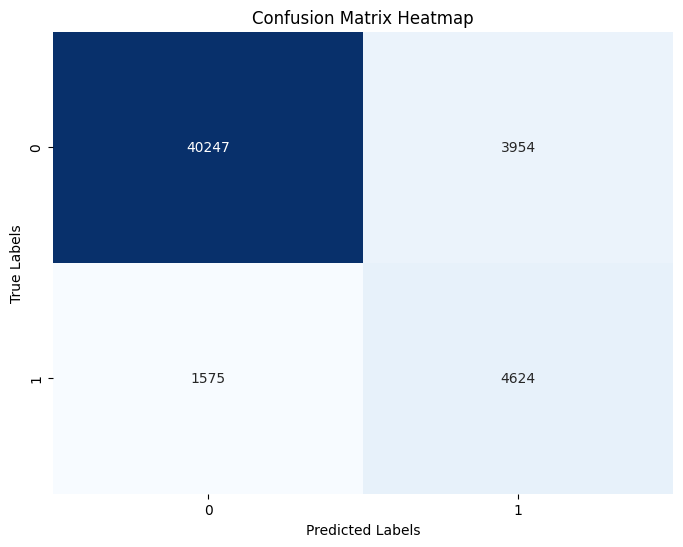

In [74]:
# Using the best decision threshold to maximize f1_scores
y_pred = (y_probs > best_threshold).astype(int)

print(f"Accuracy of optimized model w/ decision threshold: {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision of optimized model w/ decision threshold: {precision_score(y_test, y_pred):.3f}")
print(f"Recall of optimized model w/ decision threshold: {recall_score(y_test, y_pred):.3f}")

conf_matrix_optimized = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_optimized, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=y.unique(), yticklabels=y.unique())
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

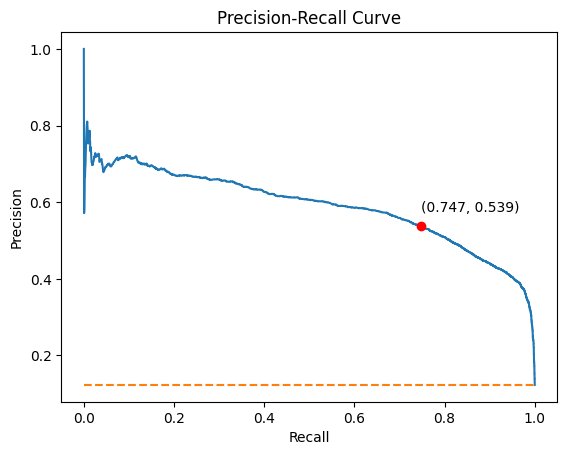

In [75]:
# Plot the precision and recall against each other, along with the baseline
baseline = len(y_test[y_test==1]) / len(y_test)
plt.plot(recall, precision)
plt.plot([0, 1], [baseline, baseline], linestyle='--')

# Plot a point corresponding to the optimized model's precision and recall
opt_recall = recall[np.argmax(f1_scores)].round(3)
opt_precision = precision[np.argmax(f1_scores)].round(3)
plt.plot(opt_recall, opt_precision, 'ro')

plt.annotate(f"({opt_recall}, {opt_precision})",
             (opt_recall, opt_precision), textcoords="offset points", xytext=(0,10))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [76]:
# Let's evaluate the training and test data precision and recall using the decision threshold
y_probs_train = best_model.predict_proba(X_train_selected)[:,1]
y_pred_train = (y_probs_train > best_threshold).astype(int)

y_probs_test = best_model.predict_proba(X_test_selected)[:,1]
y_pred_test = (y_probs_test > best_threshold).astype(int)

print(f"Train Accuracy: {accuracy_score(y_train, y_pred_train):.3f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_test):.3f}")
print( "--------------------------------------------------------------")
print(f"Train Precision: {precision_score(y_train, y_pred_train):.3f}")
print(f"Test Precision: {precision_score(y_test, y_pred_test):.3f}")
print( "--------------------------------------------------------------")
print(f"Train Recall: {recall_score(y_train, y_pred_train):.3f}")
print(f"Test Recall: {recall_score(y_test, y_pred_test):.3f}")

Train Accuracy: 0.906
Test Accuracy: 0.890
--------------------------------------------------------------
Train Precision: 0.582
Test Precision: 0.539
--------------------------------------------------------------
Train Recall: 0.831
Test Recall: 0.746


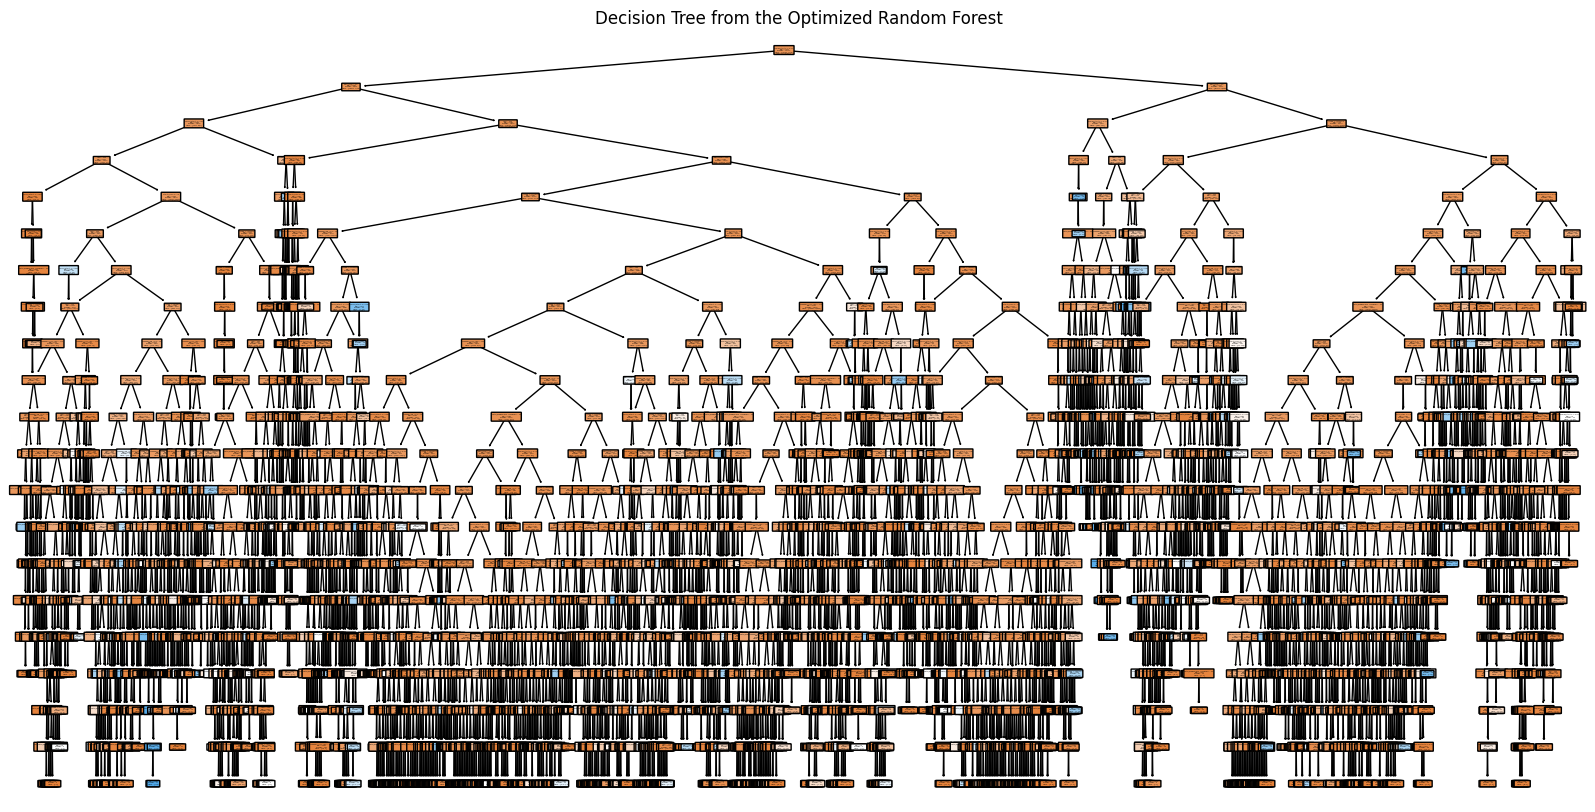

In [77]:
# Visualize one of the decision trees in this random forest

from sklearn.tree import plot_tree

tree = best_model.estimators_[0]
plt.figure(figsize=(20,10))
plot_tree(tree, feature_names=X_train_selected.columns,
          class_names=['Non-defaulter', 'Defaulter'], filled=True, rounded=True)
plt.title("Decision Tree from the Optimized Random Forest")
plt.show()

In [78]:
best_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 123,
 'verbose': 0,
 'warm_start': False}

In review, the optimized random forest model using RandomizedSearchCV, when trained on data using the top 10 important features, yields the following scores:

**Train Scores of Optimized Model using Threshholding**
* Accuracy: 0.906
* Precision: 0.582
* Recall: 0.831

**Test Scores of Optimized Model using Thresholding**
* Accuracy: 0.890
* Precision: 0.539
* Recall: 0.746

Unsurprisingly, the test scores show a decrease in all metrics. For the test data, while it seems that about 50% of the predicted defaulters are actually defaulters, the model does manage to identify about 75% of defaulters in the test data. This is an improvement over the base Random Forest Model test predictions in terms of recall -- of which it had a score of 0.526.

In short, the model's ability to generalize has been improved (after increasing the min_samples_leaf parameter), allowing it to make more stable predictions on unseen data.


### XGBoost Approach

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

clf = xgb.XGBClassifier(random_state=123)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)



In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [20, 25, 30],
    'learning_rate': [0.01, 0.1, 0.001],
    'subsample': [0.5, 0.7, 1]
}

model = xgb.XGBClassifier(random_state=123)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", grid_search.best_score_)


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters found:  {'learning_rate': 0.1, 'max_depth': 30, 'subsample': 0.5}
Best score found:  0.8981101190476191


Accuracy: 88.68%
Precision: 65.50%
Recall: 16.87%
F1 Score: 26.83%


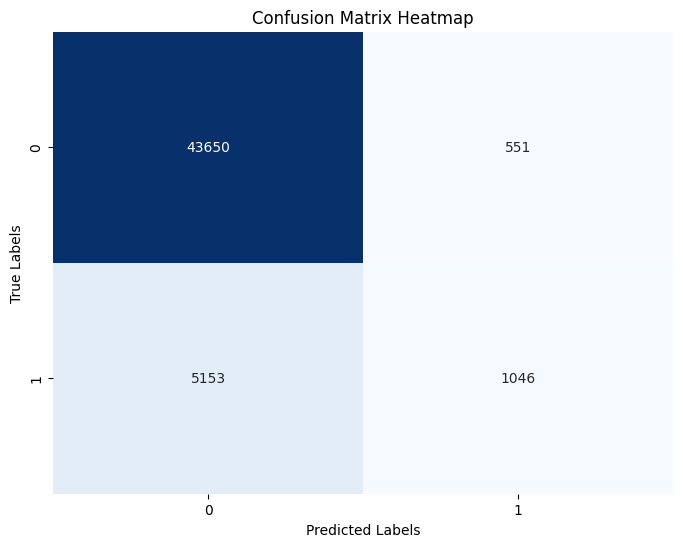

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print(f"Precision: {precision_score(y_test, y_pred) * 100:.2f}%")
print(f"Recall: {recall_score(y_test, y_pred) * 100:.2f}%")
print(f"F1 Score: {f1_score(y_test, y_pred) * 100:.2f}%")

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=y.unique(), yticklabels=y.unique())

plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()